### ML Models

In [1]:
import pandas as pd
#Libraries used
import pandas as pd
import numpy as np
import geopandas as gpd # for mapping
import matplotlib.pyplot as plt
from pandas import DataFrame

import descartes # for mapping
from shapely.geometry import Point, Polygon #for mapping
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap

#for models
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#for model reporting
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#different models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import pylab as pl
plt.style.use('seaborn')

%matplotlib inline

## Feature Engineering

This section goes into details and explains the feature engineering we did before running the model.

In [331]:
#df_main = pd.read_csv('acs_city.csv', index_col = 0)

In [490]:
df = pd.read_csv('acs_city_final.csv', index_col = 0).reset_index(drop = True)

In [491]:
df.columns

Index(['parcel_number_assess', 'depth_assess', 'year_built_assess',
       'zip_code_assess', 'lat_assess', 'lng_assess', 'geometry_assess',
       'vacant_assess', 'market_value_2015_assess', 'market_value_2016_assess',
       'market_value_2017_assess', 'market_value_2018_assess',
       'market_value_2019_assess', 'market_value_2020_assess',
       'market_value_2021_assess', 'num_years_owed_tax',
       'building_category_tax', 'is_actionable_tax', 'bankruptcy_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'principal_due_tax', 'total_due_tax',
       'total_assessment_tax', 'casenumber_diff_vio',
       'casecreateddate_year_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio', 'geometry', 'buffer_50m', 'crime_count_50m_6m',
       'crime_count_50m_3y6m', 'crime_count_50m_all', 'call_count_50m_3y6m',
       'call_count_50m_all', 'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs',
       'Shape__Are_acs', 'Shape__Len_acs'

In [492]:
df.head()

,parcel_number_assess,depth_assess,year_built_assess,zip_code_assess,lat_assess,lng_assess,geometry_assess,vacant_assess,market_value_2015_assess,market_value_2016_assess,...,Shape__Len_acs,other_vacant_acs,total_housing_acs,occupied_acs,vacant_acs,perc_vacant_acs,perc_other_vacant_acs,total_pop_acs,area_m_acs,pop_density_km_acs
0,451106305,256.00,0.0,19134.0,-75.092534,39.991459,POINT (-75.09253430091161 39.99145897715201),1,0.0,0.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
1,882021470,64.00,1929.0,19137.0,-75.087807,39.991424,POINT (-75.08780743936106 39.99142427758184),0,346400.0,346400.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
2,882059200,200.75,1980,19137.0,-75.093599,39.994604,POINT (-75.09359890860864 39.9946039149071),0,1326900.0,1326900.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
3,882076300,279.81,2008,19134.0,-75.095261,39.993647,POINT (-75.0952607737023 39.99364667194213),0,1735600.0,1735600.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173
4,453297000,248.00,1920,19137.0,-75.084600,39.992123,POINT (-75.08459994726104 39.99212306645117),0,172100.0,172100.0,...,12268.026027,48,547,499,48,0.087751,0.087751,1044,"POLYGON ((3692491.494751857 1111202.304480575,...",1335.759173


In [493]:
df.head().T

,0,1,2,3,4
parcel_number_assess,451106305,882021470,882059200,882076300,453297000
depth_assess,256.0,64.0,200.75,279.81,248.0
year_built_assess,0.0,1929.0,1980,2008,1920
zip_code_assess,19134.0,19137.0,19137.0,19134.0,19137.0
lat_assess,-75.092534,-75.087807,-75.093599,-75.095261,-75.0846
lng_assess,39.991459,39.991424,39.994604,39.993647,39.992123
geometry_assess,POINT (-75.09253430091161 39.99145897715201),POINT (-75.08780743936106 39.99142427758184),POINT (-75.09359890860864 39.9946039149071),POINT (-75.0952607737023 39.99364667194213),POINT (-75.08459994726104 39.99212306645117)
vacant_assess,1,0,0,0,0
market_value_2015_assess,0.0,346400.0,1326900.0,1735600.0,172100.0
market_value_2016_assess,0.0,346400.0,1326900.0,1735600.0,172100.0


In [494]:
df.shape

(460901, 50)

In [495]:
df.dtypes

parcel_number_assess               int64
depth_assess                     float64
year_built_assess                 object
zip_code_assess                  float64
lat_assess                       float64
lng_assess                       float64
geometry_assess                   object
vacant_assess                      int64
market_value_2015_assess         float64
market_value_2016_assess         float64
market_value_2017_assess         float64
market_value_2018_assess         float64
market_value_2019_assess         float64
market_value_2020_assess         float64
market_value_2021_assess         float64
num_years_owed_tax               float64
building_category_tax             object
is_actionable_tax                 object
bankruptcy_tax                    object
sheriff_sale_tax                  object
sequestration_enforcement_tax     object
payment_agreement_tax             object
principal_due_tax                float64
total_due_tax                    float64
total_assessment

In [496]:
df.isna().sum()

parcel_number_assess                  0
depth_assess                        507
year_built_assess                  2146
zip_code_assess                       0
lat_assess                            0
lng_assess                            0
geometry_assess                       0
vacant_assess                         0
market_value_2015_assess           2956
market_value_2016_assess           2955
market_value_2017_assess           2955
market_value_2018_assess           2950
market_value_2019_assess           1951
market_value_2020_assess            719
market_value_2021_assess            321
num_years_owed_tax               399186
building_category_tax            399261
is_actionable_tax                399186
bankruptcy_tax                   399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
principal_due_tax                399186
total_due_tax                    399186
total_assessment_tax             399260


In [497]:
(df.isna().sum()/df.shape[0])*100# percentage of null values
#column ending in tax have high percentage of null values

parcel_number_assess              0.000000
depth_assess                      0.110002
year_built_assess                 0.465610
zip_code_assess                   0.000000
lat_assess                        0.000000
lng_assess                        0.000000
geometry_assess                   0.000000
vacant_assess                     0.000000
market_value_2015_assess          0.641352
market_value_2016_assess          0.641136
market_value_2017_assess          0.641136
market_value_2018_assess          0.640051
market_value_2019_assess          0.423301
market_value_2020_assess          0.155999
market_value_2021_assess          0.069646
num_years_owed_tax               86.609923
building_category_tax            86.626195
is_actionable_tax                86.609923
bankruptcy_tax                   86.609923
sheriff_sale_tax                 86.609923
sequestration_enforcement_tax    86.609923
payment_agreement_tax            86.609923
principal_due_tax                86.609923
total_due_t

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460901 entries, 0 to 460900
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   parcel_number_assess           460901 non-null  int64  
 1   depth_assess                   460394 non-null  float64
 2   year_built_assess              458755 non-null  object 
 3   zip_code_assess                460901 non-null  float64
 4   lat_assess                     460901 non-null  float64
 5   lng_assess                     460901 non-null  float64
 6   geometry_assess                460901 non-null  object 
 7   vacant_assess                  460901 non-null  int64  
 8   market_value_2015_assess       457945 non-null  float64
 9   market_value_2016_assess       457946 non-null  float64
 10  market_value_2017_assess       457946 non-null  float64
 11  market_value_2018_assess       457951 non-null  float64
 12  market_value_2019_assess      

In [499]:
df['vacant_assess'].value_counts()#showing how many there are vacant and non-vacant land

0    424202
1     36699
Name: vacant_assess, dtype: int64

In [500]:
#converting values to catgory
df['parcel_number_assess'] = df['parcel_number_assess'].astype('category')
df['zip_code_assess'] = df['zip_code_assess'].astype('category')
df['TRACTCE10_acs'] = df['TRACTCE10_acs'].astype('category')
df['BLKGRPCE10_acs'] = df['BLKGRPCE10_acs'].astype('category')
df['GEOID10_acs'] = df['GEOID10_acs'].astype('category')

In [ ]:
df['year_built_assess'] = df['year_built_assess'].replace(['196Y'], '1960')# replacing 196Y with 1960. This might be a mistake while creating the dataset

In [ ]:
df.loc[df['year_built_assess'] == 0].shape# big percentage of year built column is 0 

(34580, 34)

In [ ]:
DataFrame(df.year_built_assess.value_counts().sort_values(ascending = False)/df.shape[0])
#most of the are built in 1925 and 1920

,year_built_assess
1925.0,0.215387
1920.0,0.156031
0.0,0.075027
1950.0,0.074487
1915.0,0.067570
...,...
1943,0.000002
1904.0,0.000002
1869,0.000002
1885,0.000002


In [ ]:
df['year_built_assess'].isna().sum()#there are also 2146 that are null values

2146

In [ ]:
#manipulating yearbuilt, converting to float
df['year_built_assess'] = df['year_built_assess'].astype('float')

In [ ]:
df['year_built_assess_diff'] = 2021 - df['year_built_assess']#creating new column that take the difference between 2021 and the year the place was built

In [ ]:
df['year_built_assess_diff'].median()# median of the new column

96.0

In [ ]:
df['year_built_assess_diff'].hist()

In [501]:
#96 is the median, so replacing all irregular values with 96
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(2021, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(-7129.0, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace([-1, -2], 0) # replacing with 0 as the year is more than 2021 here

df['year_built_assess_diff'] = df['year_built_assess_diff'].fillna(96)#replacing all null values with 96

In [ ]:
df['year_built_assess_diff'].hist()

In [502]:
df = df.drop(['year_built_assess'], axis = 1) # dropping the actual year built as we don't need this any more

In [503]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
geometry_assess                    object
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2016_assess          float64
market_value_2017_assess          float64
market_value_2018_assess          float64
market_value_2019_assess          float64
market_value_2020_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
bankruptcy_tax                     object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
principal_due_tax                 float64
total_due_tax                     float64
total_assessment_tax              

In [504]:
df['building_category_tax'].unique()# column has null values

array([nan, 'residential', 'commercial'], dtype=object)

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3260832947.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'depth_assess'}>,
        <AxesSubplot:title={'center':'lat_assess'}>,
        <AxesSubplot:title={'center':'lng_assess'}>,
        <AxesSubplot:title={'center':'vacant_assess'}>,
        <AxesSubplot:title={'center':'market_value_2015_assess'}>,
        <AxesSubplot:title={'center':'market_value_2016_assess'}>],
       [<AxesSubplot:title={'center':'market_value_2017_assess'}>,
        <AxesSubplot:title={'center':'market_value_2018_assess'}>,
        <AxesSubplot:title={'center':'market_value_2019_assess'}>,
        <AxesSubplot:title={'center':'market_value_2020_assess'}>,
        <AxesSubplot:title={'center':'market_value_2021_assess'}>,
        <AxesSubplot:title={'center':'num_years_owed_tax'}>],
       [<AxesSubplot:title={'center':'principal_due_tax'}>,
        <AxesSubplot:title={'center':'total_due_tax'}>,
        <AxesSubplot:title={'center':'total_assessment_tax'}>,
        <AxesSubplot:title={'center':'casenumber_diff_vio'}>,
        <A

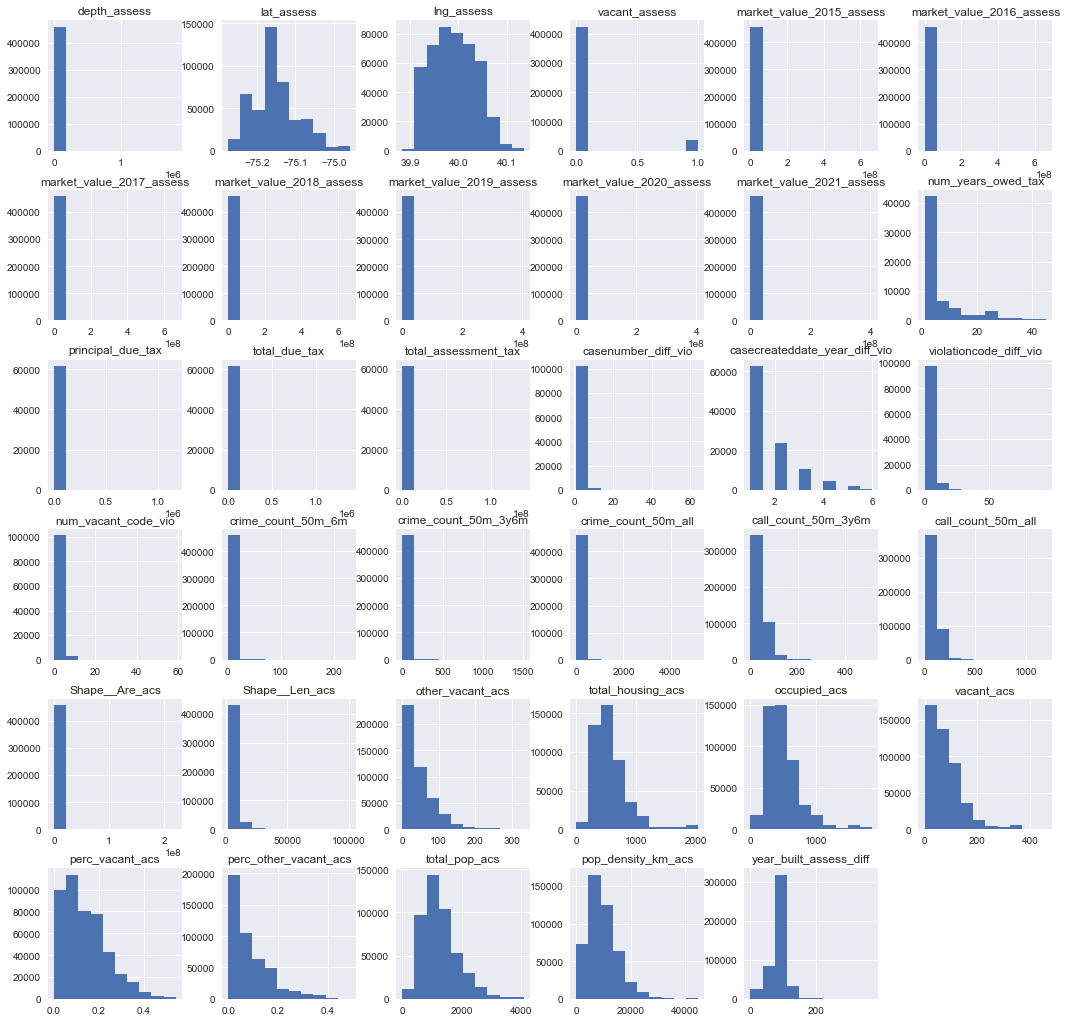

In [505]:
fig,ax = plt.subplots(figsize = (18,18))# checking histogram to see distribution
df.hist(ax = ax)

In [506]:
df[['building_category_tax', 'is_actionable_tax', 'bankruptcy_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'principal_due_tax', 'total_due_tax',
       'total_assessment_tax', 'casenumber_diff_vio',
       'casecreateddate_year_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio']].dtypes # columns with high percentage of null values

building_category_tax             object
is_actionable_tax                 object
bankruptcy_tax                    object
sheriff_sale_tax                  object
sequestration_enforcement_tax     object
payment_agreement_tax             object
principal_due_tax                float64
total_due_tax                    float64
total_assessment_tax             float64
casenumber_diff_vio              float64
casecreateddate_year_diff_vio    float64
violationcode_diff_vio           float64
num_vacant_code_vio              float64
dtype: object

In [507]:
#replacing null values with 0 for all integer columns
df['num_years_owed_tax'] = df['num_years_owed_tax'].fillna(0)
df['principal_due_tax'] = df['principal_due_tax'].fillna(0)
df['total_due_tax'] = df['total_due_tax'].fillna(0)
df['casenumber_diff_vio'] = df['casenumber_diff_vio'].fillna(0)
df['casecreateddate_year_diff_vio'] = df['casecreateddate_year_diff_vio'].fillna(0)
df['violationcode_diff_vio'] = df['violationcode_diff_vio'].fillna(0)
df['num_vacant_code_vio'] = df['num_vacant_code_vio'].fillna(0)

In [508]:
df[['building_category_tax', 'is_actionable_tax', 'bankruptcy_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'principal_due_tax', 'total_due_tax',
       'total_assessment_tax', 'casenumber_diff_vio',
       'casecreateddate_year_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio']].isna().sum()
# we wil remove the total_asssessment_tax as the amount is based off the value of the property. There are other columns that has property values

building_category_tax            399261
is_actionable_tax                399186
bankruptcy_tax                   399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
principal_due_tax                     0
total_due_tax                         0
total_assessment_tax             399260
casenumber_diff_vio                   0
casecreateddate_year_diff_vio         0
violationcode_diff_vio                0
num_vacant_code_vio                   0
dtype: int64

In [509]:
#we can do these replacement on null values but we decided to not do this in the final model as nul values are treated as seperate category if we use certain feature engineering
df['building_category_tax'].fillna("no-tax", inplace = True) #residential or commercial
df['is_actionable_tax'].fillna("no-tax", inplace = True)
df['sheriff_sale_tax'].fillna("N", inplace = True) #N means not in shriff sale process
df['sequestration_enforcement_tax'].fillna("False", inplace = True) #False means not in sequestration_enforcement
df['payment_agreement_tax'].fillna("False", inplace = True)#False means not in payment agreement

In [510]:
df = df.drop(['bankruptcy_tax','total_assessment_tax'], axis = 1) #dropping bankrupcy_tax as all values are False, 
#removing total_assessment_tax as as this value is based off the property assessment which we have already

In [511]:
(df.isna().sum()/df.shape[0])*100 # there are still some null values left. We will work with them later if we end up using them in the final model

parcel_number_assess             0.000000
depth_assess                     0.110002
zip_code_assess                  0.000000
lat_assess                       0.000000
lng_assess                       0.000000
geometry_assess                  0.000000
vacant_assess                    0.000000
market_value_2015_assess         0.641352
market_value_2016_assess         0.641136
market_value_2017_assess         0.641136
market_value_2018_assess         0.640051
market_value_2019_assess         0.423301
market_value_2020_assess         0.155999
market_value_2021_assess         0.069646
num_years_owed_tax               0.000000
building_category_tax            0.000000
is_actionable_tax                0.000000
sheriff_sale_tax                 0.000000
sequestration_enforcement_tax    0.000000
payment_agreement_tax            0.000000
principal_due_tax                0.000000
total_due_tax                    0.000000
casenumber_diff_vio              0.000000
casecreateddate_year_diff_vio    0

In [512]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
geometry_assess                    object
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2016_assess          float64
market_value_2017_assess          float64
market_value_2018_assess          float64
market_value_2019_assess          float64
market_value_2020_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
principal_due_tax                 float64
total_due_tax                     float64
casenumber_diff_vio               float64
casecreateddate_year_diff_vio     

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3199843707.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'depth_assess'}>,
        <AxesSubplot:title={'center':'lat_assess'}>,
        <AxesSubplot:title={'center':'lng_assess'}>,
        <AxesSubplot:title={'center':'vacant_assess'}>,
        <AxesSubplot:title={'center':'market_value_2015_assess'}>,
        <AxesSubplot:title={'center':'market_value_2016_assess'}>],
       [<AxesSubplot:title={'center':'market_value_2017_assess'}>,
        <AxesSubplot:title={'center':'market_value_2018_assess'}>,
        <AxesSubplot:title={'center':'market_value_2019_assess'}>,
        <AxesSubplot:title={'center':'market_value_2020_assess'}>,
        <AxesSubplot:title={'center':'market_value_2021_assess'}>,
        <AxesSubplot:title={'center':'num_years_owed_tax'}>],
       [<AxesSubplot:title={'center':'principal_due_tax'}>,
        <AxesSubplot:title={'center':'total_due_tax'}>,
        <AxesSubplot:title={'center':'casenumber_diff_vio'}>,
        <AxesSubplot:title={'center':'casecreateddate_year_diff_vio'}>,
 

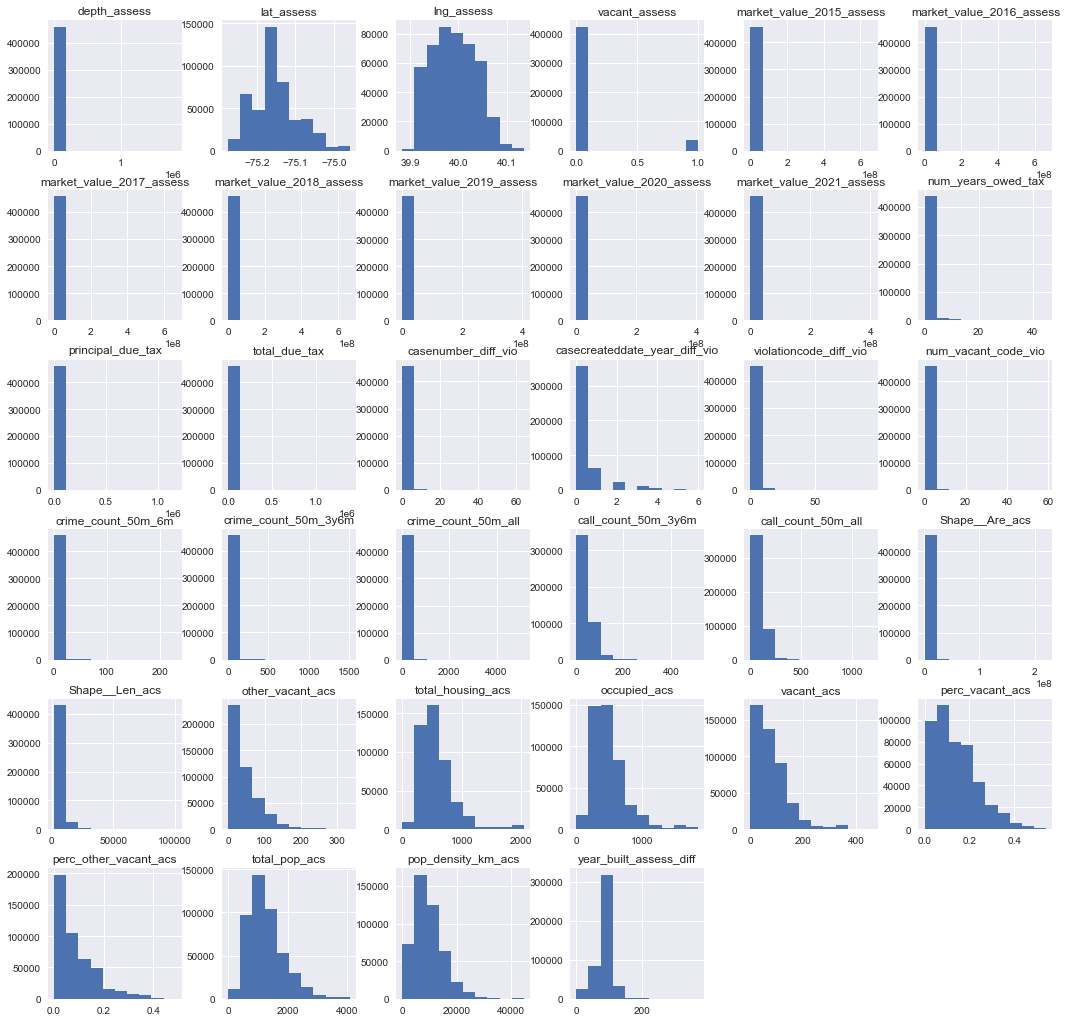

In [513]:
#histogram after replacing columns with high null values. Most columns are still heavily skewed
fig,ax = plt.subplots(figsize = (18,18))
df.hist(ax = ax)

<AxesSubplot:>

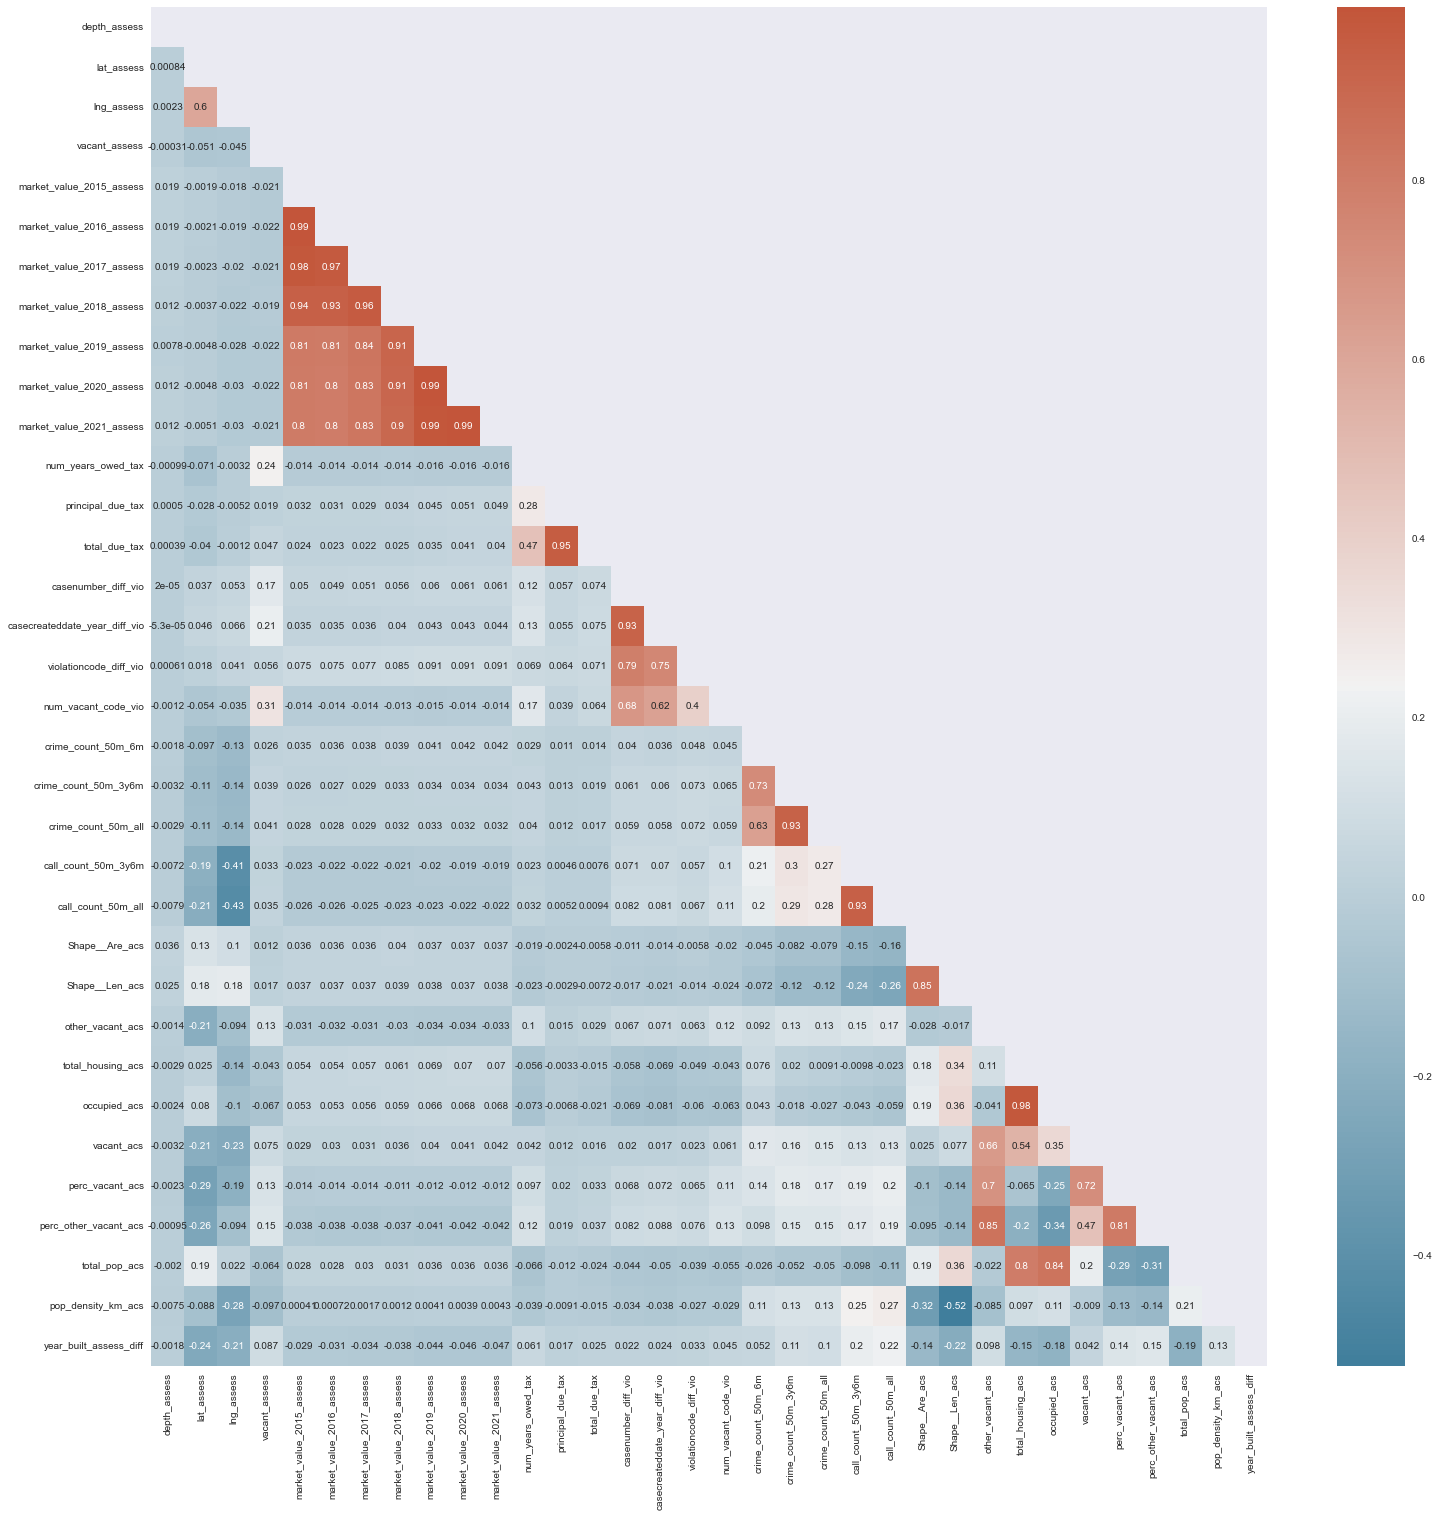

In [514]:
#correlation matrix
corr = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [515]:
#removing columns that has more than 0.9 in correlation
df = df.drop(['principal_due_tax', 'casecreateddate_year_diff_vio', 'crime_count_50m_3y6m',
        'call_count_50m_3y6m', 'occupied_acs', 'market_value_2016_assess', 'market_value_2017_assess', 'market_value_2018_assess', 'market_value_2019_assess', 'market_value_2020_assess'], axis = 1)


In [516]:
df.columns

Index(['parcel_number_assess', 'depth_assess', 'zip_code_assess', 'lat_assess',
       'lng_assess', 'geometry_assess', 'vacant_assess',
       'market_value_2015_assess', 'market_value_2021_assess',
       'num_years_owed_tax', 'building_category_tax', 'is_actionable_tax',
       'sheriff_sale_tax', 'sequestration_enforcement_tax',
       'payment_agreement_tax', 'total_due_tax', 'casenumber_diff_vio',
       'violationcode_diff_vio', 'num_vacant_code_vio', 'geometry',
       'buffer_50m', 'crime_count_50m_6m', 'crime_count_50m_all',
       'call_count_50m_all', 'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs',
       'Shape__Are_acs', 'Shape__Len_acs', 'other_vacant_acs',
       'total_housing_acs', 'vacant_acs', 'perc_vacant_acs',
       'perc_other_vacant_acs', 'total_pop_acs', 'area_m_acs',
       'pop_density_km_acs', 'year_built_assess_diff'],
      dtype='object')

<AxesSubplot:>

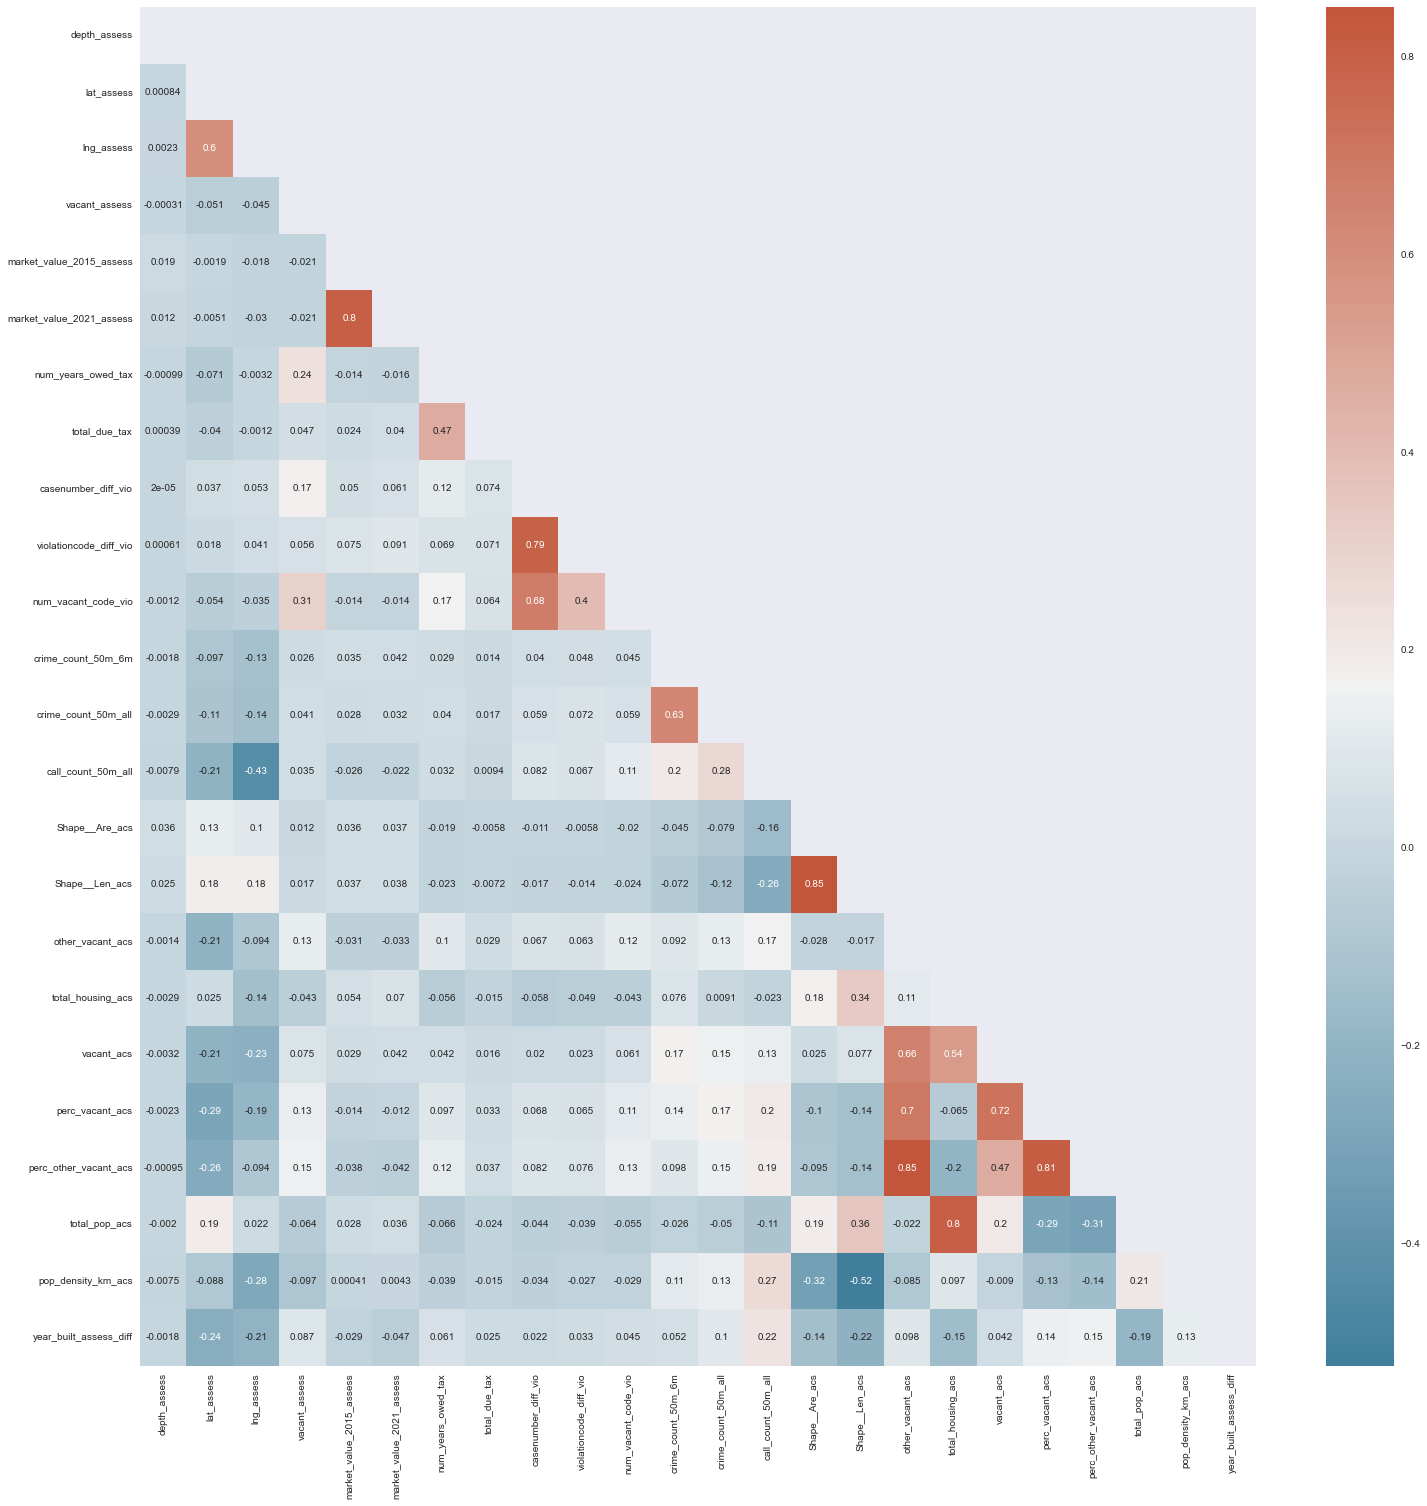

In [517]:
#checking correlation after removing columns with high correlation
corr = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [518]:
df.shape

(460901, 38)

In [519]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
geometry_assess                    object
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
geometry                           object
buffer_50m                         object
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                

In [520]:
df = df.drop(['geometry_assess', 'geometry', 'buffer_50m','area_m_acs'], axis = 1) #dropping these as they seem irrelevant to the ML model

In [521]:
df.shape

(460901, 34)

In [522]:
df.isna().sum()

parcel_number_assess                0
depth_assess                      507
zip_code_assess                     0
lat_assess                          0
lng_assess                          0
vacant_assess                       0
market_value_2015_assess         2956
market_value_2021_assess          321
num_years_owed_tax                  0
building_category_tax               0
is_actionable_tax                   0
sheriff_sale_tax                    0
sequestration_enforcement_tax       0
payment_agreement_tax               0
total_due_tax                       0
casenumber_diff_vio                 0
violationcode_diff_vio              0
num_vacant_code_vio                 0
crime_count_50m_6m                  0
crime_count_50m_all                 0
call_count_50m_all                  0
TRACTCE10_acs                       0
BLKGRPCE10_acs                      0
GEOID10_acs                         0
Shape__Are_acs                      0
Shape__Len_acs                      0
other_vacant

In [523]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax              object
is_actionable_tax                  object
sheriff_sale_tax                   object
sequestration_enforcement_tax      object
payment_agreement_tax              object
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                  int64
TRACTCE10_acs                    category
BLKGRPCE10_acs                   category
GEOID10_acs                      c

In [524]:
df.shape

(460901, 34)

<AxesSubplot:>

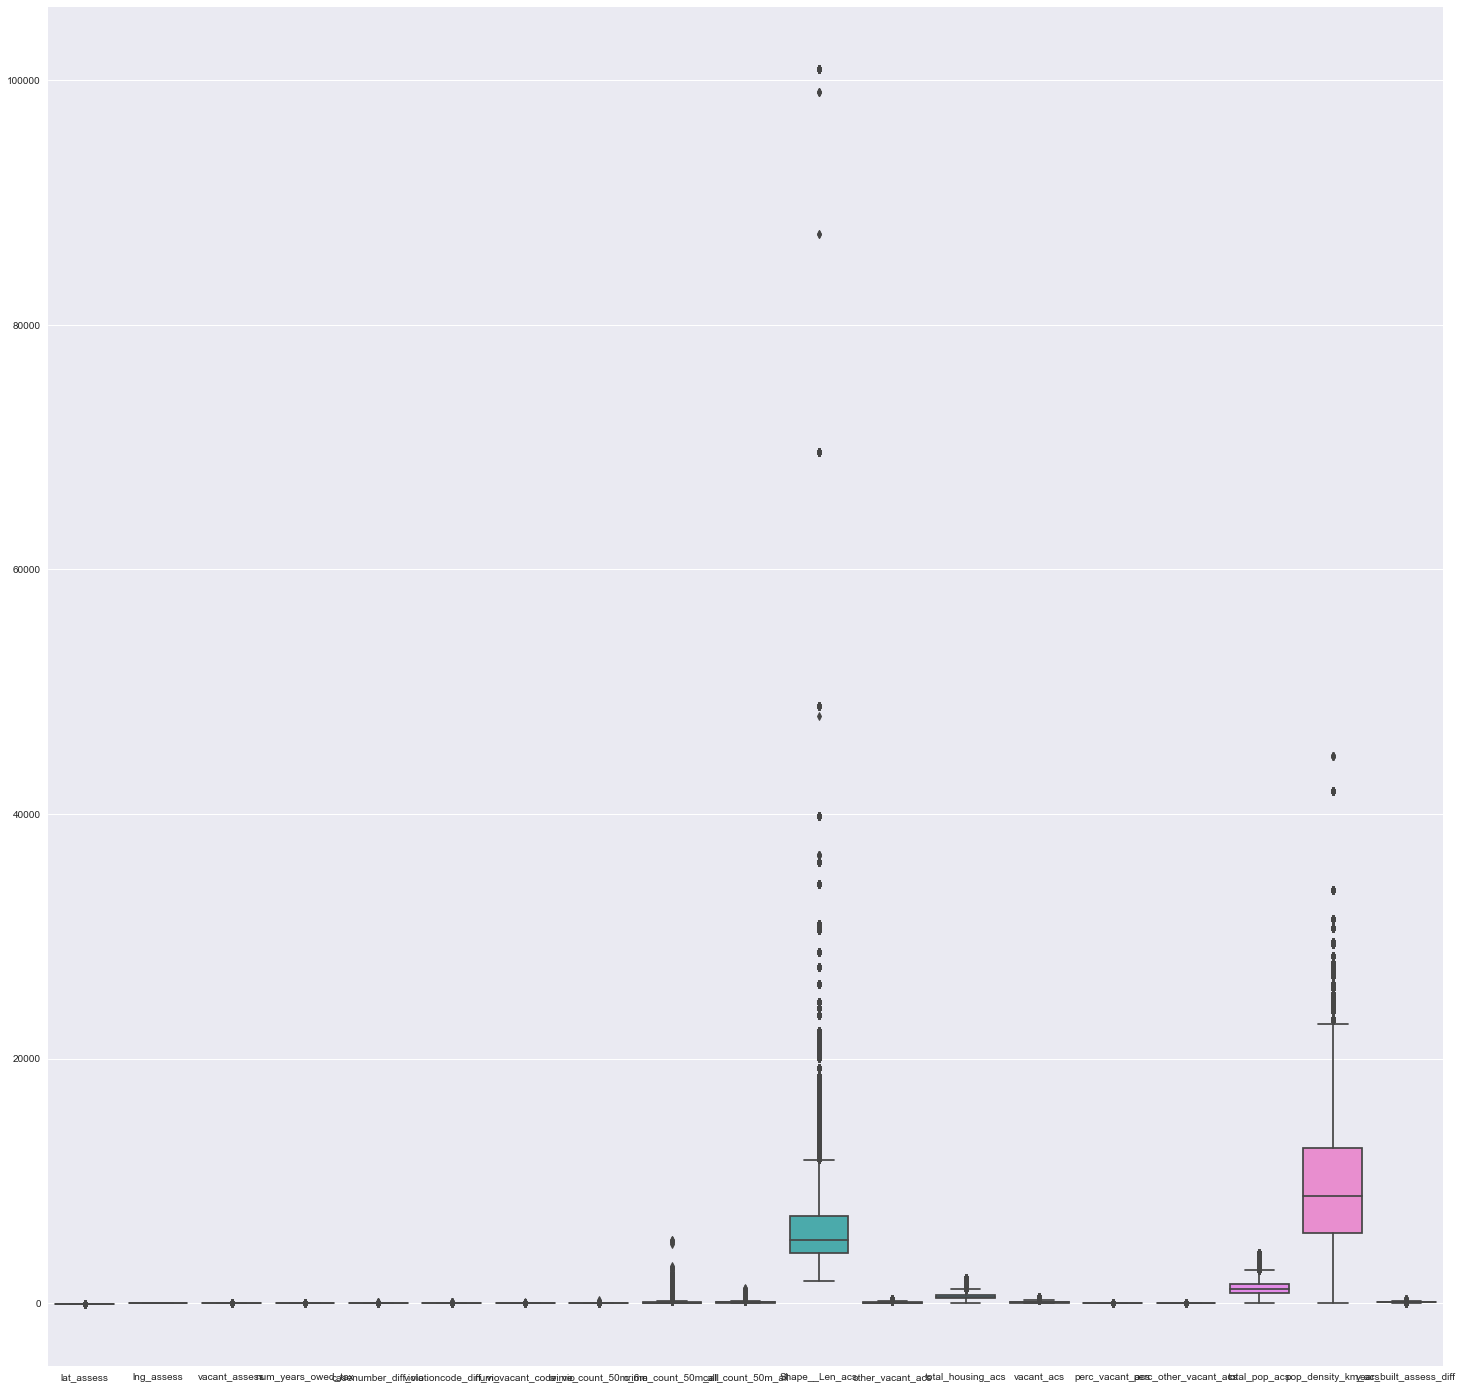

In [537]:
#box plot of some of the columns
f, ax = plt.subplots(figsize=(25, 25))
sns.boxplot(data = df.drop(['market_value_2015_assess', 'market_value_2021_assess', 'Shape__Are_acs', 'total_due_tax', 'depth_assess'], axis = 1), ax = ax)

<AxesSubplot:>

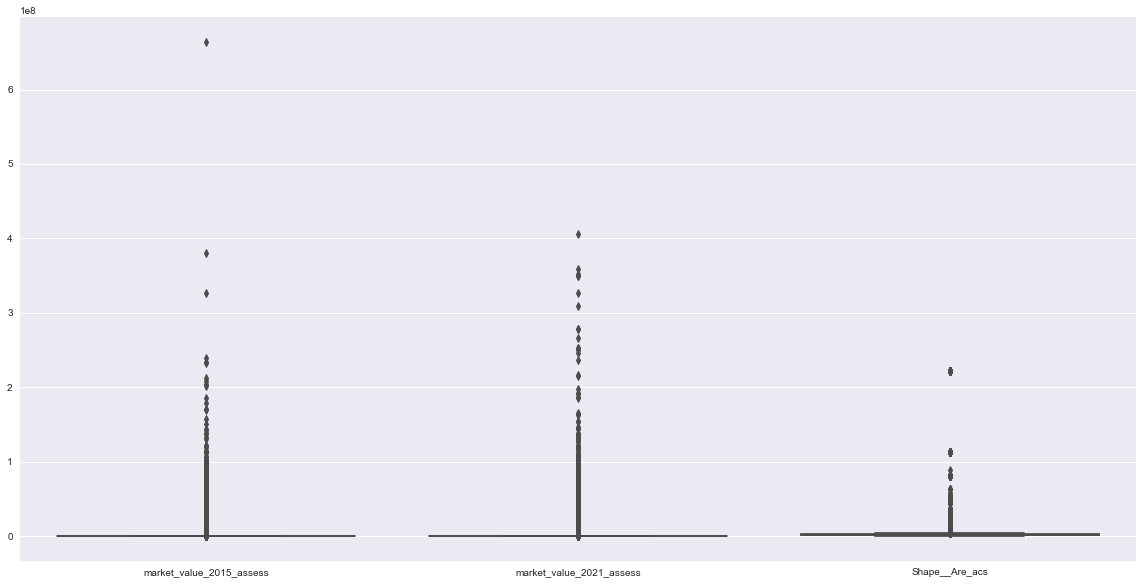

In [538]:
#box plot
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = df[['market_value_2015_assess', 'market_value_2021_assess', 'Shape__Are_acs']], ax = ax)

<AxesSubplot:>

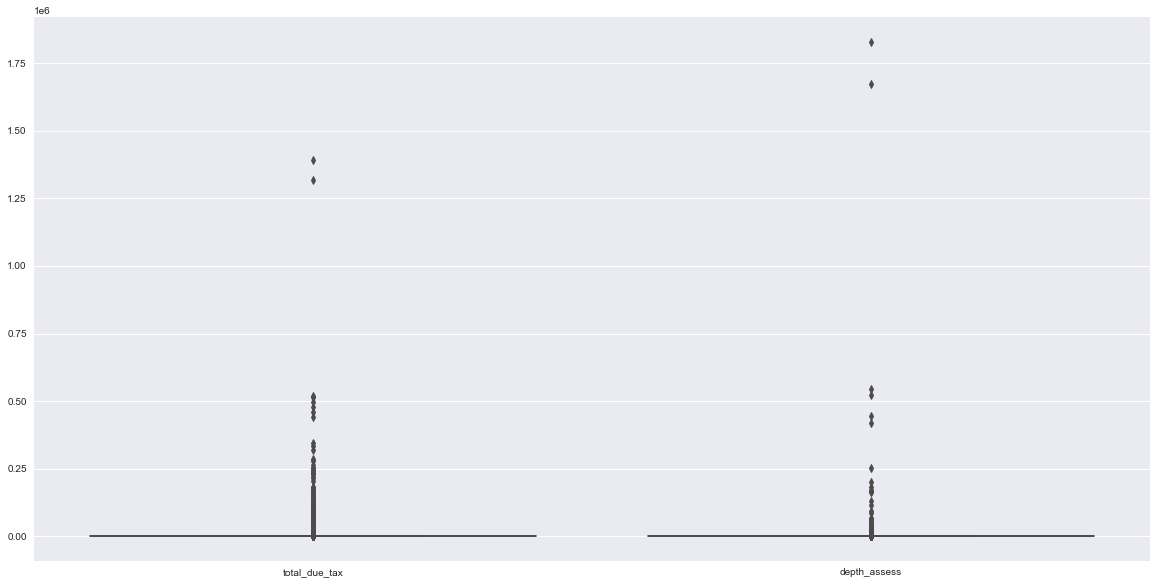

In [539]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = df[['total_due_tax', 'depth_assess']], ax = ax)

In [540]:
#converting some of the boolean value to strings
df['is_actionable_tax'] = df['is_actionable_tax'].replace({True : 'True',
                                False : 'False'})
df['sequestration_enforcement_tax'] = df['sequestration_enforcement_tax'].replace({True : 'True',
                                False : 'False'})
df['payment_agreement_tax'] = df['payment_agreement_tax'].replace({True : 'True',
                                False : 'False'})

In [541]:
df.shape

(460901, 34)

In [542]:
df.isna().sum() 

parcel_number_assess                0
depth_assess                      507
zip_code_assess                     0
lat_assess                          0
lng_assess                          0
vacant_assess                       0
market_value_2015_assess         2956
market_value_2021_assess          321
num_years_owed_tax                  0
building_category_tax               0
is_actionable_tax                   0
sheriff_sale_tax                    0
sequestration_enforcement_tax       0
payment_agreement_tax               0
total_due_tax                       0
casenumber_diff_vio                 0
violationcode_diff_vio              0
num_vacant_code_vio                 0
crime_count_50m_6m                  0
crime_count_50m_all                 0
call_count_50m_all                  0
TRACTCE10_acs                       0
BLKGRPCE10_acs                      0
GEOID10_acs                         0
Shape__Are_acs                      0
Shape__Len_acs                      0
other_vacant

In [543]:
df.shape

(460901, 34)

In [544]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
vacant_assess                       int64
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax            category
is_actionable_tax                category
sheriff_sale_tax                 category
sequestration_enforcement_tax    category
payment_agreement_tax            category
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                  int64
TRACTCE10_acs                    category
BLKGRPCE10_acs                   category
GEOID10_acs                      c

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3230475155.py:7: UserWarning: To output multiple subplots, the figure containing the passed axe

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

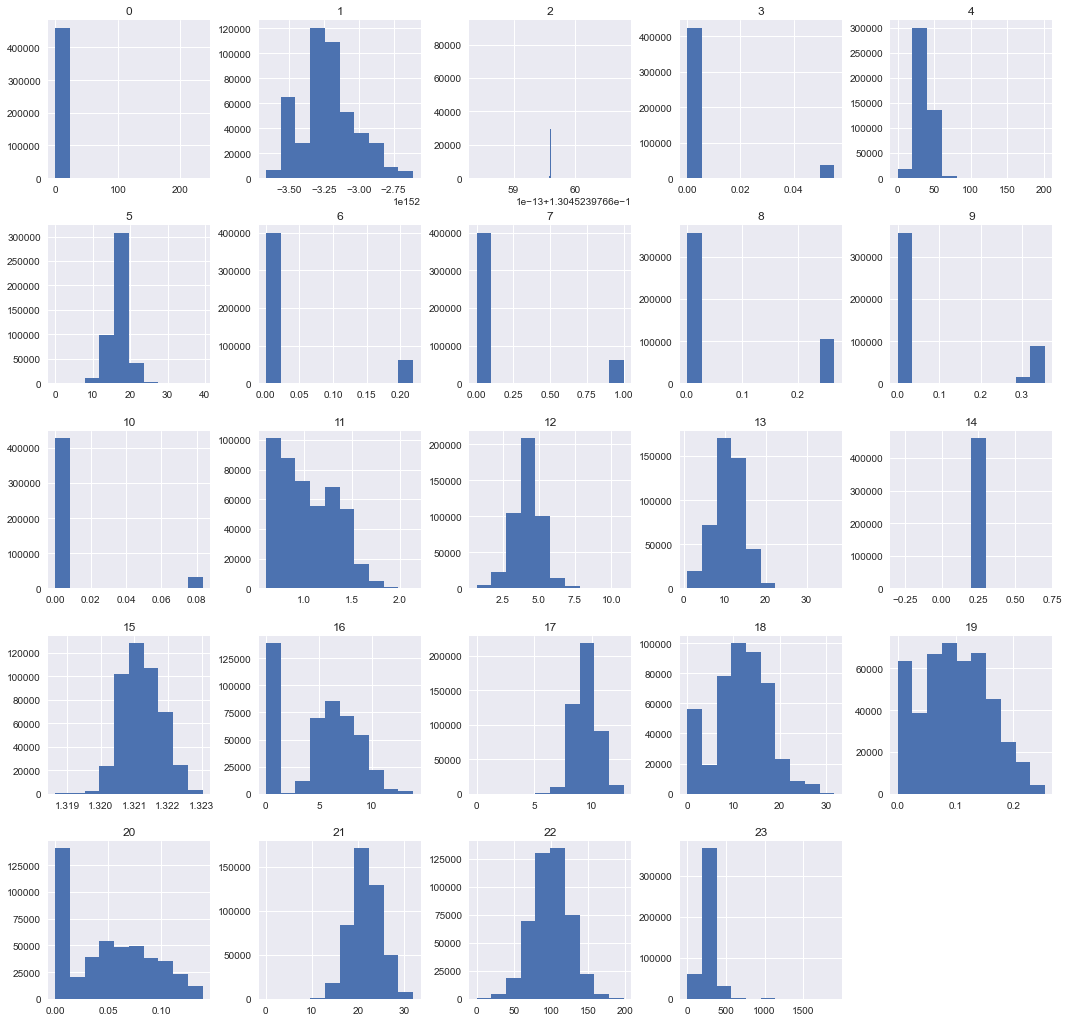

In [545]:
# most of the numerical values are skewed, this transformation is not that bad on the distribution
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)#when yeo-johnson is not standardized
test = pt.fit_transform(df.select_dtypes(exclude = 'category'))
fig,ax = plt.subplots(figsize = (18,18))
DataFrame(test).hist(ax = ax)

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3967266628.py:7: UserWarning: To output multiple subplots, the figure containing the passed axe

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

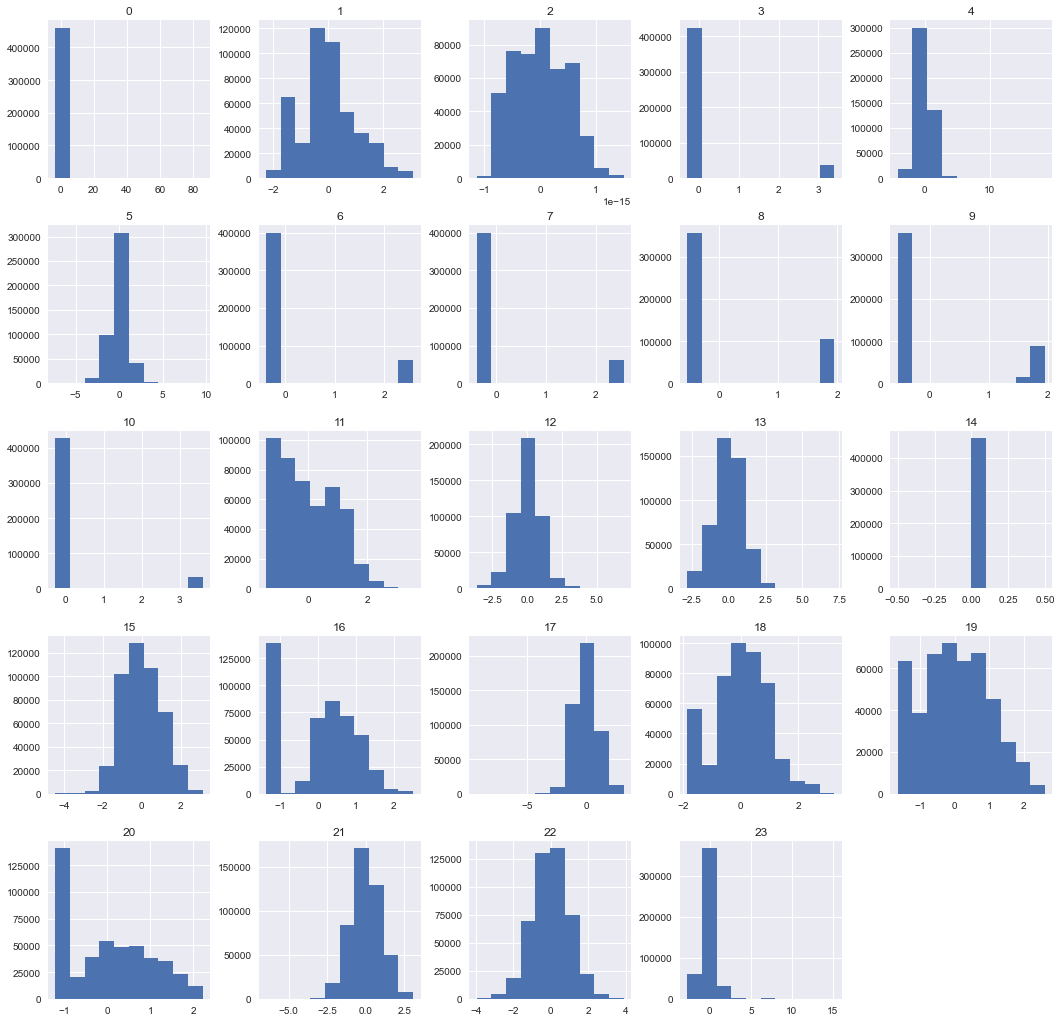

In [674]:
# most of the numerical values are skewed, this transformation is not that bad on the distribution
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) #when yeo-johnson is standardized
test = pt.fit_transform(df.select_dtypes(exclude = 'category'))
fig,ax = plt.subplots(figsize = (18,18))
DataFrame(test).hist(ax = ax)

/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_878/3210513466.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  DataFrame(X_trans).hist(ax = ax)


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

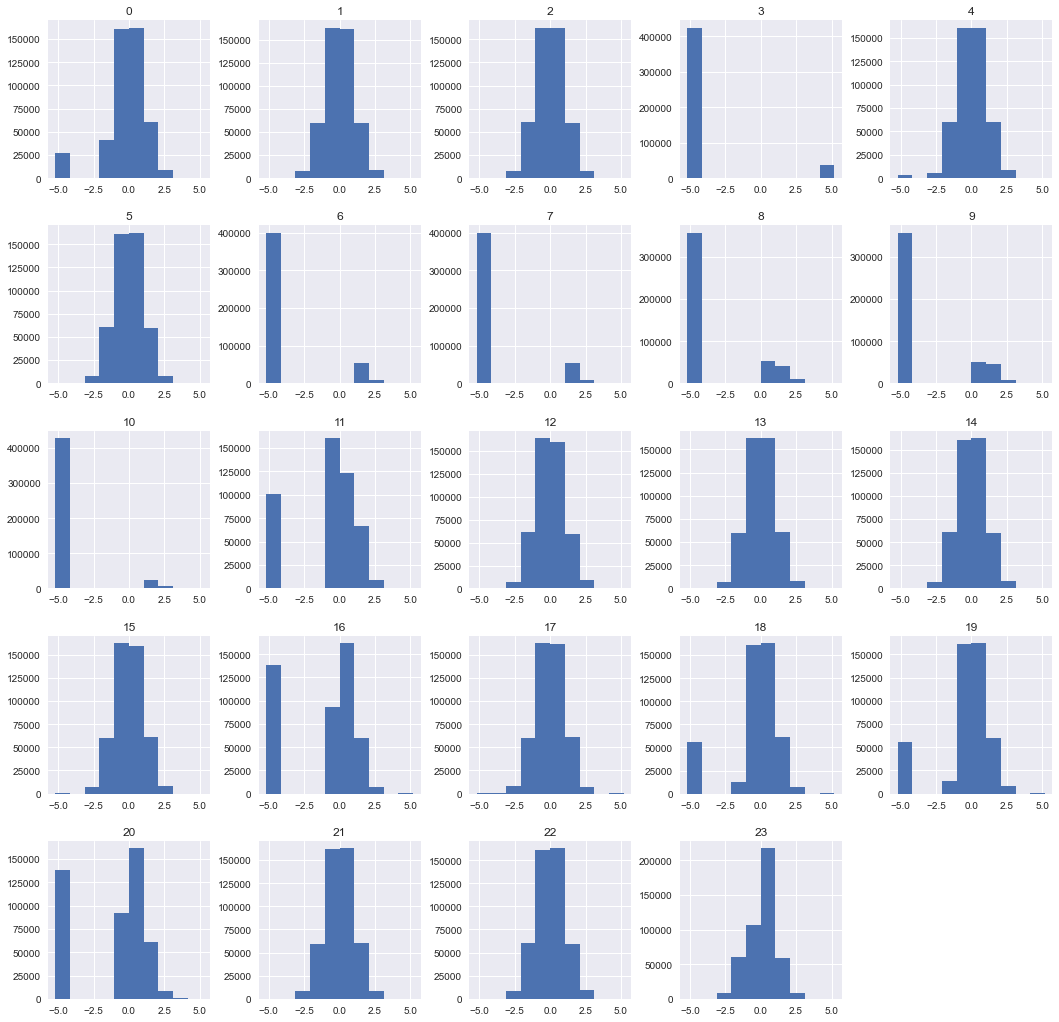

In [546]:
# most of the numerical values are skewed, QuantileTransformer  can turn into normal distribution
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(df.select_dtypes(exclude = 'category'))
fig,ax = plt.subplots(figsize = (18,18))
DataFrame(X_trans).hist(ax = ax)

<AxesSubplot:>

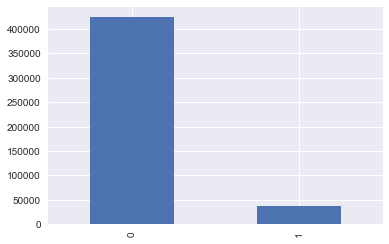

In [547]:
df.vacant_assess.value_counts().plot.bar()

In [548]:
df['zip_code_assess'].nunique()#51 unique zip codes

51

In [549]:
df = df.reset_index(drop=True)

In [550]:
df.tail()

,parcel_number_assess,depth_assess,zip_code_assess,lat_assess,lng_assess,vacant_assess,market_value_2015_assess,market_value_2021_assess,num_years_owed_tax,building_category_tax,...,Shape__Are_acs,Shape__Len_acs,other_vacant_acs,total_housing_acs,vacant_acs,perc_vacant_acs,perc_other_vacant_acs,total_pop_acs,pop_density_km_acs,year_built_assess_diff
460896,662369900,95.0,19154.0,-74.988450,40.083494,0,186000.0,208200.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,48.0
460897,662371300,95.0,19154.0,-74.987455,40.083163,0,186000.0,208200.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,48.0
460898,662371100,95.0,19154.0,-74.987589,40.083197,0,186000.0,208200.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,48.0
460899,662420600,90.0,19154.0,-74.985190,40.083194,0,181000.0,237900.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,55.0
460900,662404400,92.0,19154.0,-74.989668,40.084106,0,192500.0,210300.0,0.0,no-tax,...,4.374977e+06,8707.673782,23,319,23,0.0721,0.0721,784,1928.816766,47.0


In [551]:
#df.to_csv("model_data.csv", index = False)

In [552]:
df.columns

Index(['parcel_number_assess', 'depth_assess', 'zip_code_assess', 'lat_assess',
       'lng_assess', 'vacant_assess', 'market_value_2015_assess',
       'market_value_2021_assess', 'num_years_owed_tax',
       'building_category_tax', 'is_actionable_tax', 'sheriff_sale_tax',
       'sequestration_enforcement_tax', 'payment_agreement_tax',
       'total_due_tax', 'casenumber_diff_vio', 'violationcode_diff_vio',
       'num_vacant_code_vio', 'crime_count_50m_6m', 'crime_count_50m_all',
       'call_count_50m_all', 'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs',
       'Shape__Are_acs', 'Shape__Len_acs', 'other_vacant_acs',
       'total_housing_acs', 'vacant_acs', 'perc_vacant_acs',
       'perc_other_vacant_acs', 'total_pop_acs', 'pop_density_km_acs',
       'year_built_assess_diff'],
      dtype='object')

In [553]:
#top 5 zip code that does not have vacant lots
df.loc[df['vacant_assess'] ==0].groupby(['vacant_assess', 'zip_code_assess'])['parcel_number_assess'].nunique().sort_values(ascending = False).head()

vacant_assess  zip_code_assess
0              19143.0            21983
               19134.0            21314
               19140.0            18855
               19124.0            18693
               19148.0            18464
Name: parcel_number_assess, dtype: int64

In [554]:
#top 5 zip codes with vacant lots
df.loc[df['vacant_assess'] ==1].groupby(['vacant_assess', 'zip_code_assess'])['parcel_number_assess'].nunique().sort_values(ascending = False).head()

vacant_assess  zip_code_assess
1              19133.0            4587
               19121.0            4074
               19132.0            3924
               19140.0            2582
               19134.0            2439
Name: parcel_number_assess, dtype: int64

In [555]:
df.shape

(460901, 34)

In [556]:
df['vacant_assess'].value_counts()

0    424202
1     36699
Name: vacant_assess, dtype: int64

In [557]:
df['parcel_number_assess'].nunique()#each row is a unique parcel number

460901

In [558]:
df_m = df.copy()#copying the datafram as we will be creating models on this

# Models

This part includes all of the understanding of the dataset we received in the first part and incorporating them on the dataset.

In [2]:
df = pd.read_csv('acs_city_final.csv', index_col = 0).reset_index(drop = True)

df = df.drop(['bankruptcy_tax','total_assessment_tax'], axis = 1) #remoing these as all values on bankrupcy is the same and total assessemnt is based off other value in the dataset
df = df.drop(['principal_due_tax', 'casecreateddate_year_diff_vio', 'crime_count_50m_3y6m',
        'call_count_50m_3y6m', 'occupied_acs', 'market_value_2016_assess', 'market_value_2017_assess', 
        'market_value_2018_assess', 'market_value_2019_assess', 'market_value_2020_assess'], axis = 1)#from correlation matrix
df = df.drop(['geometry_assess', 'geometry', 'buffer_50m','area_m_acs'], axis = 1) #not relevant

#manipulating yearbuilt
df['year_built_assess'] = df['year_built_assess'].replace(['196Y'], '1960')
df['year_built_assess'] = df['year_built_assess'].astype('float')
df['year_built_assess_diff'] = 2021 - df['year_built_assess']

#96 is the median, so replacing all irregular values with 96
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(2021, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace(-7129.0, 96)
df['year_built_assess_diff'] = df['year_built_assess_diff'].replace([-1, -2], 0) # replacing with 0 as the year is more than 2021 here

df['year_built_assess_diff'] = df['year_built_assess_diff'].fillna(96)#replacing all null values with 96

df = df.drop(['year_built_assess'], axis = 1)

#converting values to  objects
df['parcel_number_assess'] = df['parcel_number_assess'].astype('category')
df['zip_code_assess'] = df['zip_code_assess'].astype('category')
df['TRACTCE10_acs'] = df['TRACTCE10_acs'].astype('category')
df['BLKGRPCE10_acs'] = df['BLKGRPCE10_acs'].astype('category')
df['GEOID10_acs'] = df['GEOID10_acs'].astype('category')
df['vacant_assess'] = df['vacant_assess'].astype('category')

#converting some of the boolean value to strings
df['is_actionable_tax'] = df['is_actionable_tax'].replace({True : 'True',
                                False : 'False'})
df['sequestration_enforcement_tax'] = df['sequestration_enforcement_tax'].replace({True : 'True',
                                False : 'False'})
df['payment_agreement_tax'] = df['payment_agreement_tax'].replace({True : 'True',
                                False : 'False'})


#replacing no-numerimal null columns-- Step is being done in pipeline so commented here
#df['building_category_tax'].fillna("no-tax", inplace = True) #residential or commercial
#df['is_actionable_tax'].fillna("no-tax", inplace = True)
#df['sheriff_sale_tax'].fillna("N", inplace = True) #N means not in shriff sale process
#df['sequestration_enforcement_tax'].fillna("False", inplace = True) #False means not in sequestration_enforcement
#df['payment_agreement_tax'].fillna("False", inplace = True)#False means not in payment agreement



#convert to category
df['is_actionable_tax'] = df['is_actionable_tax'].astype('category')
df['sequestration_enforcement_tax'] = df['sequestration_enforcement_tax'].astype('category')
df['payment_agreement_tax'] = df['payment_agreement_tax'].astype('category')
df['building_category_tax'] = df['building_category_tax'].astype('category')
df['sheriff_sale_tax'] = df['sheriff_sale_tax'].astype('category')


#replacing null values with 0 for all integer columns
df['num_years_owed_tax'] = df['num_years_owed_tax'].fillna(0)
df['total_due_tax'] = df['total_due_tax'].fillna(0)
df['casenumber_diff_vio'] = df['casenumber_diff_vio'].fillna(0)
df['violationcode_diff_vio'] = df['violationcode_diff_vio'].fillna(0)
df['num_vacant_code_vio'] = df['num_vacant_code_vio'].fillna(0)


#replace numerical null values with median-- Step is being done in pipeline so commented here
#df['depth_assess'].fillna((df['depth_assess'].median()), inplace=True)
#df['market_value_2015_assess'].fillna((df['market_value_2015_assess'].median()), inplace=True)
#df['market_value_2021_assess'].fillna((df['market_value_2021_assess'].median()), inplace=True)

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.select_dtypes(include = "category").columns# columns that are categories

Index(['parcel_number_assess', 'zip_code_assess', 'vacant_assess',
       'building_category_tax', 'is_actionable_tax', 'sheriff_sale_tax',
       'sequestration_enforcement_tax', 'payment_agreement_tax',
       'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs'],
      dtype='object')

In [4]:
df.select_dtypes(exclude = "category").columns # non-category columns

Index(['depth_assess', 'lat_assess', 'lng_assess', 'market_value_2015_assess',
       'market_value_2021_assess', 'num_years_owed_tax', 'total_due_tax',
       'casenumber_diff_vio', 'violationcode_diff_vio', 'num_vacant_code_vio',
       'crime_count_50m_6m', 'crime_count_50m_all', 'call_count_50m_all',
       'Shape__Are_acs', 'Shape__Len_acs', 'other_vacant_acs',
       'total_housing_acs', 'vacant_acs', 'perc_vacant_acs',
       'perc_other_vacant_acs', 'total_pop_acs', 'pop_density_km_acs',
       'year_built_assess_diff'],
      dtype='object')

In [5]:
df.dtypes

parcel_number_assess             category
depth_assess                      float64
zip_code_assess                  category
lat_assess                        float64
lng_assess                        float64
vacant_assess                    category
market_value_2015_assess          float64
market_value_2021_assess          float64
num_years_owed_tax                float64
building_category_tax            category
is_actionable_tax                category
sheriff_sale_tax                 category
sequestration_enforcement_tax    category
payment_agreement_tax            category
total_due_tax                     float64
casenumber_diff_vio               float64
violationcode_diff_vio            float64
num_vacant_code_vio               float64
crime_count_50m_6m                  int64
crime_count_50m_all                 int64
call_count_50m_all                  int64
TRACTCE10_acs                    category
BLKGRPCE10_acs                   category
GEOID10_acs                      c

In [6]:
df.isna().sum()

parcel_number_assess                  0
depth_assess                        507
zip_code_assess                       0
lat_assess                            0
lng_assess                            0
vacant_assess                         0
market_value_2015_assess           2956
market_value_2021_assess            321
num_years_owed_tax                    0
building_category_tax            399261
is_actionable_tax                399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
total_due_tax                         0
casenumber_diff_vio                   0
violationcode_diff_vio                0
num_vacant_code_vio                   0
crime_count_50m_6m                    0
crime_count_50m_all                   0
call_count_50m_all                    0
TRACTCE10_acs                         0
BLKGRPCE10_acs                        0
GEOID10_acs                           0
Shape__Are_acs                        0


/var/folders/6p/wpw9qml57530xkxqkkhprrf40000gn/T/ipykernel_97834/3982607327.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'depth_assess'}>,
        <AxesSubplot:title={'center':'lat_assess'}>,
        <AxesSubplot:title={'center':'lng_assess'}>,
        <AxesSubplot:title={'center':'market_value_2015_assess'}>,
        <AxesSubplot:title={'center':'market_value_2021_assess'}>],
       [<AxesSubplot:title={'center':'num_years_owed_tax'}>,
        <AxesSubplot:title={'center':'total_due_tax'}>,
        <AxesSubplot:title={'center':'casenumber_diff_vio'}>,
        <AxesSubplot:title={'center':'violationcode_diff_vio'}>,
        <AxesSubplot:title={'center':'num_vacant_code_vio'}>],
       [<AxesSubplot:title={'center':'crime_count_50m_6m'}>,
        <AxesSubplot:title={'center':'crime_count_50m_all'}>,
        <AxesSubplot:title={'center':'call_count_50m_all'}>,
        <AxesSubplot:title={'center':'Shape__Are_acs'}>,
        <AxesSubplot:title={'center':'Shape__Len_acs'}>],
       [<AxesSubplot:title={'center':'other_vacant_acs'}>,
        <AxesSubplot:title={'center':'t

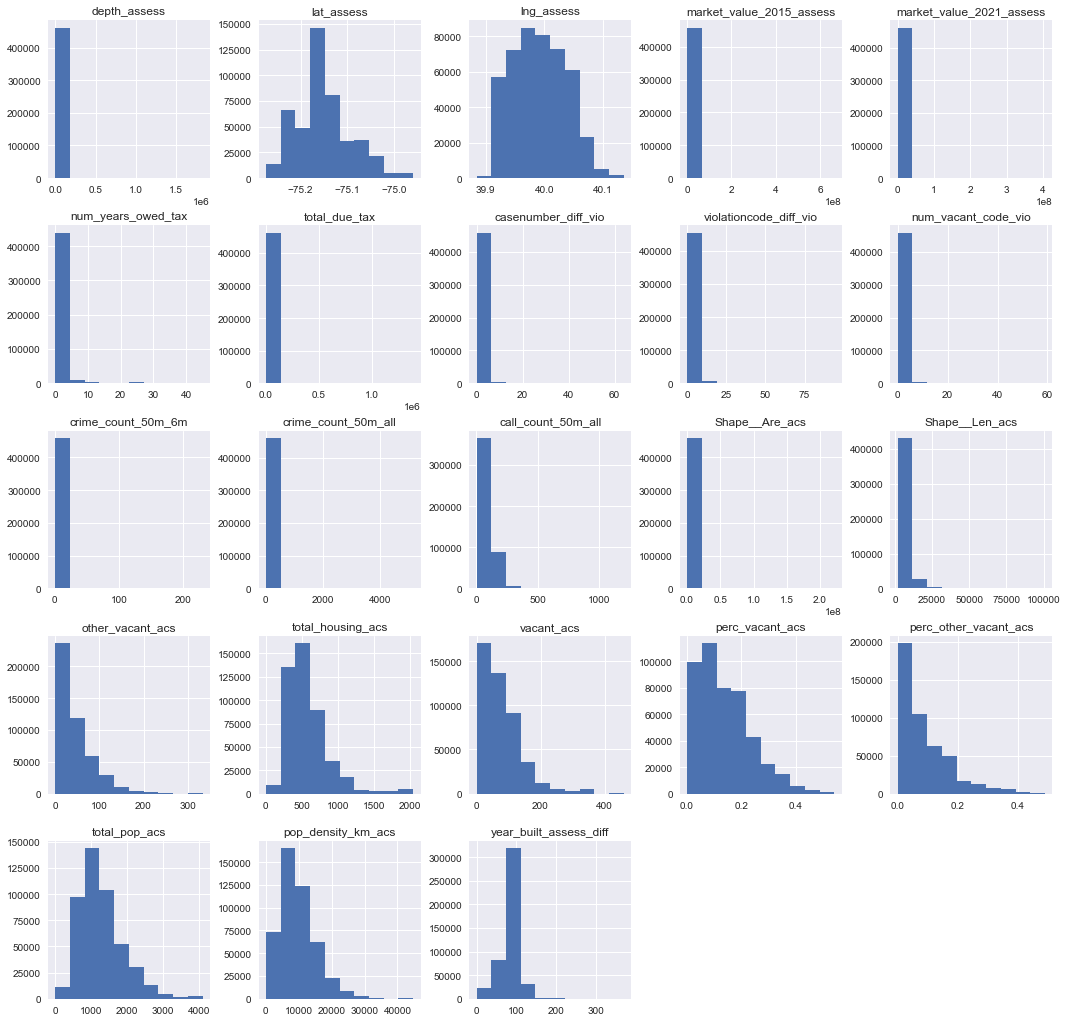

In [7]:
fig,ax = plt.subplots(figsize = (18,18))
df.hist(ax = ax)

In [8]:
df.describe()

,depth_assess,lat_assess,lng_assess,market_value_2015_assess,market_value_2021_assess,num_years_owed_tax,total_due_tax,casenumber_diff_vio,violationcode_diff_vio,num_vacant_code_vio,...,Shape__Are_acs,Shape__Len_acs,other_vacant_acs,total_housing_acs,vacant_acs,perc_vacant_acs,perc_other_vacant_acs,total_pop_acs,pop_density_km_acs,year_built_assess_diff
count,4.603940e+05,460901.000000,460901.000000,4.579450e+05,4.605800e+05,460901.000000,4.609010e+05,460901.000000,460901.000000,460901.000000,...,4.609010e+05,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000,460901.000000
mean,9.286732e+01,-75.151838,39.991048,1.890623e+05,2.536247e+05,0.859870,7.626564e+02,0.483466,0.853522,0.185660,...,2.197351e+06,6263.217792,42.189941,574.083907,76.594466,0.136794,0.082230,1283.391531,9687.637698,88.296265
std,4.012603e+03,0.057878,0.045676,2.139592e+06,2.673490e+06,3.760617,5.528522e+03,1.234430,2.277929,0.853065,...,4.212765e+06,3743.742788,45.562291,293.483281,65.511580,0.101137,0.086913,616.445907,5538.110479,25.939718
min,0.000000e+00,-75.274212,39.884087,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,1.803535e+05,1794.706669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.450000e+01,-75.182973,39.952386,5.360000e+04,6.030000e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,9.039015e+05,4100.023828,0.000000,379.000000,31.000000,0.064327,0.000000,845.000000,5765.967268,76.000000
50%,7.100000e+01,-75.158343,39.988445,9.660000e+04,1.135000e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,1.341076e+06,5173.907627,31.000000,508.000000,63.000000,0.118727,0.063551,1171.000000,8768.058757,96.000000
75%,9.333000e+01,-75.122507,40.028371,1.561000e+05,1.971000e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,2.254406e+06,7163.067872,62.000000,687.000000,109.000000,0.196721,0.123894,1585.000000,12667.791311,101.000000
max,1.829520e+06,-74.959341,40.135964,6.639432e+08,4.056370e+08,45.000000,1.391257e+06,64.000000,94.000000,59.000000,...,2.213137e+08,100965.278313,334.000000,2043.000000,460.000000,0.542645,0.489933,4099.000000,44772.034568,369.000000


In [9]:
df_m = df.copy()

### Making dataset ready for Models

In [10]:
df_1 = df_m.drop(['parcel_number_assess'], axis=1)#removing parcel_number
#df_1_obj = df_1.select_dtypes(include = [object])# create seperate dataframe with only objects

In [11]:
X = df_1.drop(['vacant_assess'], axis = 1)
Y = df_1['vacant_assess']

In [12]:
df_1.select_dtypes(include = 'category').columns

Index(['zip_code_assess', 'vacant_assess', 'building_category_tax',
       'is_actionable_tax', 'sheriff_sale_tax',
       'sequestration_enforcement_tax', 'payment_agreement_tax',
       'TRACTCE10_acs', 'BLKGRPCE10_acs', 'GEOID10_acs'],
      dtype='object')

In [13]:
df_1.select_dtypes(exclude = 'category').columns

Index(['depth_assess', 'lat_assess', 'lng_assess', 'market_value_2015_assess',
       'market_value_2021_assess', 'num_years_owed_tax', 'total_due_tax',
       'casenumber_diff_vio', 'violationcode_diff_vio', 'num_vacant_code_vio',
       'crime_count_50m_6m', 'crime_count_50m_all', 'call_count_50m_all',
       'Shape__Are_acs', 'Shape__Len_acs', 'other_vacant_acs',
       'total_housing_acs', 'vacant_acs', 'perc_vacant_acs',
       'perc_other_vacant_acs', 'total_pop_acs', 'pop_density_km_acs',
       'year_built_assess_diff'],
      dtype='object')

In [14]:
X.isna().sum()

depth_assess                        507
zip_code_assess                       0
lat_assess                            0
lng_assess                            0
market_value_2015_assess           2956
market_value_2021_assess            321
num_years_owed_tax                    0
building_category_tax            399261
is_actionable_tax                399186
sheriff_sale_tax                 399186
sequestration_enforcement_tax    399186
payment_agreement_tax            399186
total_due_tax                         0
casenumber_diff_vio                   0
violationcode_diff_vio                0
num_vacant_code_vio                   0
crime_count_50m_6m                    0
crime_count_50m_all                   0
call_count_50m_all                    0
TRACTCE10_acs                         0
BLKGRPCE10_acs                        0
GEOID10_acs                           0
Shape__Are_acs                        0
Shape__Len_acs                        0
other_vacant_acs                      0


## Logistic Regression

**Logistic Regression with no Scaler or Power Transformation**

In [873]:
#replacement and null value happening in a pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), #replacing the numerical null values with median
            #("scaler", StandardScaler()),
            #("transform", PowerTransformer(method='yeo-johnson', standardize=True))
            #("transform", QuantileTransformer(output_distribution='normal', random_state=0))
            ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore") 
#there are null values
#missing value is considered a seperate category

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude= 'category')),
        ("cat", categorical_transformer, selector(dtype_include= 'category'))
    ]
)
#selector(dtype_include= 'category')(df)
#selector(dtype_exclude= 'category')(df)


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=500))]
)


#Segmention test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)#proportion of both classes raim the same in both test and train


#calculating accuracy score
clf.fit(X_train, y_train)
print("model score on train: %.3f" % clf.score(X_train, y_train))
print("model score on test: %.3f" % clf.score(X_test, y_test))


#Confusion Matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
print(cm)
#84800 is true positive,84800 were not vacant lots
#442 is true negative, 442 were vacant lots
#6906 is flase negative, predicted vacant lots but it was not vacant
#33 is False positive, predicted not vacant but its vacant


#Classification Report
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, y_pred, target_names=target_names))
#high accuracy rate but very low recall and f1 score for vacant lots
#low f1 score means poor precision and poor recall
#We would like to also cover recall number. A lot of the lots were predicted as vacant but it wasnt

model score on train: 0.926
model score on test: 0.926
[[84794    47]
 [ 6800   540]]
                 precision    recall  f1-score   support

Not Vacant Lots       0.93      1.00      0.96     84841
    Vacant Lots       0.92      0.07      0.14      7340

       accuracy                           0.93     92181
      macro avg       0.92      0.54      0.55     92181
   weighted avg       0.93      0.93      0.90     92181



**Logistic Regression with Standard Scaler**

In [874]:
#replacement and null value happening in a pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), #replacing the numerical null values with median
            ("scaler", StandardScaler()),
            #StandardScaler removes the mean and scales the data to unit variance. 
            #However, the outliers have an influence when computing the empirical mean and standard deviation.

            #("transform", PowerTransformer(method='yeo-johnson', standardize=True))
            #("transform", QuantileTransformer(output_distribution='normal', random_state=0))
            ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore") 
#there are null values
#missing value is considered a seperate category

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude= 'category')),
        ("cat", categorical_transformer, selector(dtype_include= 'category'))
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1500))]
)


#Segmention test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


#calculating accuracy score
clf.fit(X_train, y_train)
print("model score on train: %.3f" % clf.score(X_train, y_train))
print("model score on test: %.3f" % clf.score(X_test, y_test))


#Confusion Matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
print(cm)


#Classification Report
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, y_pred, target_names=target_names))
#high accuracy rate but still very low recall and f1 score for vacant lots


#Standard Scaler does improve the model a little. As we have noticed before from the box plot diagrams, there are outliers in this dataset. That might be the reason why it is not working properly

model score on train: 0.949
model score on test: 0.949
[[84232   609]
 [ 4103  3237]]
                 precision    recall  f1-score   support

Not Vacant Lots       0.95      0.99      0.97     84841
    Vacant Lots       0.84      0.44      0.58      7340

       accuracy                           0.95     92181
      macro avg       0.90      0.72      0.78     92181
   weighted avg       0.94      0.95      0.94     92181



**Logistic Regression with Quantile Transformation**

In [875]:
#replacement and null value happening in a pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), #replacing the numerical null values with median
            #("scaler", StandardScaler()),
            #("transform", PowerTransformer(method='yeo-johnson', standardize=True))#using yeo-johnson as values contain non-positive values.
            ("transform", QuantileTransformer(output_distribution='normal', random_state=0))
            #QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution.
            #as this is set to 'normal distribution' it is going map to a Gaussian distribution, 
            ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore") 
#there are null values
#missing value is considered a seperate category

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude= 'category')),
        ("cat", categorical_transformer, selector(dtype_include= 'category'))
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=2000))]
)


#Segmention test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


#calculating accuracy score
clf.fit(X_train, y_train)
print("model score on train: %.3f" % clf.score(X_train, y_train))
print("model score on test: %.3f" % clf.score(X_test, y_test))


#Confusion Matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
print(cm)


#Classification Report
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, y_pred, target_names=target_names))

#the result is not bad

model score on train: 0.979
model score on test: 0.978
[[84115   726]
 [ 1278  6062]]
                 precision    recall  f1-score   support

Not Vacant Lots       0.99      0.99      0.99     84841
    Vacant Lots       0.89      0.83      0.86      7340

       accuracy                           0.98     92181
      macro avg       0.94      0.91      0.92     92181
   weighted avg       0.98      0.98      0.98     92181



**Logistic Regression with Power Transformation**

In [876]:
#replacement and null value happening in a pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), #replacing the numerical null values with median
            #("scaler", StandardScaler()),
            ("transform", PowerTransformer(method='yeo-johnson', standardize=True))
            #PowerTransformer applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. 
            #using yeo-johnson as values contain non-positive values.
            
            #("transform", QuantileTransformer(output_distribution='normal', random_state=0))
            #QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution.

            ]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore") 
#there are null values
#missing value is considered a seperate category

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude= 'category')),
        ("cat", categorical_transformer, selector(dtype_include= 'category'))
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))]
)


#Segmention test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


#calculating accuracy score
clf.fit(X_train, y_train)
print("model score on train: %.3f" % clf.score(X_train, y_train))
print("model score on test: %.3f" % clf.score(X_test, y_test))


#Confusion Matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
print(cm)


#Classification Report
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, y_pred, target_names=target_names))

#this gives the best result

#The accuracy of the model is basically the total number of correct predictions divided by total number of predictions. 
#The precision of a class define how trustable is the result when the model answer that a point belongs to that class.
#The recall of a class expresses how well the model is able to detect that class. 
#The F1 score of a class is given by the harmonic mean of precision and recall

#For our case, we will be giving more attention to recall score of vacant lots. Also, the f1 score of vacant lots
#the model still shows high precicion and low recall of vacant lots which showa that model can't detect the class well but is trustable when it does. 

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


model score on train: 0.981
model score on test: 0.980
[[84185   656]
 [ 1182  6158]]
                 precision    recall  f1-score   support

Not Vacant Lots       0.99      0.99      0.99     84841
    Vacant Lots       0.90      0.84      0.87      7340

       accuracy                           0.98     92181
      macro avg       0.94      0.92      0.93     92181
   weighted avg       0.98      0.98      0.98     92181



**Hyperparameter Tuning: Logistic Regression with Power Transformation**

In [883]:
param_grid = {
    #"preprocessor__num__imputer__strategy": ["mean", "median"],
    'classifier__penalty': ['l2'],
    "classifier__C": [0.1, 1.0, 10, 100], #with differenct C values
    "classifier__solver": ['newton-cg', 'lbfgs', 'liblinear'] # different solvers
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('transform',
                                                                                          PowerTransformer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x1c0451990>),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                     

In [884]:
grid_search.get_params().keys()# available in grid search

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__preprocessor', 'estimator__classifier', 'estimator__preprocessor__n_jobs', 'estimator__preprocessor__remainder', 'estimator__preprocessor__sparse_threshold', 'estimator__preprocessor__transformer_weights', 'estimator__preprocessor__transformers', 'estimator__preprocessor__verbose', 'estimator__preprocessor__verbose_feature_names_out', 'estimator__preprocessor__num', 'estimator__preprocessor__cat', 'estimator__preprocessor__num__memory', 'estimator__preprocessor__num__steps', 'estimator__preprocessor__num__verbose', 'estimator__preprocessor__num__imputer', 'estimator__preprocessor__num__transform', 'estimator__preprocessor__num__imputer__add_indicator', 'estimator__preprocessor__num__imputer__copy', 'estimator__preprocessor__num__imputer__fill_value', 'estimator__preprocessor__num__imputer__missing_values', 'estimator__preprocessor__num__imputer__strategy', 'estimator__preprocessor

In [885]:
#calling fit triggers the search for the best hyper parameter combination. This takes a long time to run
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)
#Best params:
#{'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/priankaball/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:3222: RuntimeWarning: overflow encountered in power


Best params:
{'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [886]:
#internal cross validation scores
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.980


In [887]:
#top grid search results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_classifier__C",
        "param_classifier__penalty",
        "param_classifier__solver"
    ]
].head(5)

,mean_test_score,std_test_score,param_classifier__C,param_classifier__penalty,param_classifier__solver
11,0.980091,0.000825,100,l2,liblinear
4,0.980082,0.000768,1.0,l2,lbfgs
3,0.980077,0.000769,1.0,l2,newton-cg
6,0.980063,0.000802,10,l2,newton-cg
9,0.980063,0.000830,100,l2,newton-cg


In [888]:
print(
    (
        "best logistic regression from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

best logistic regression from grid search: 0.980


In [889]:
#classification report from best value from grid search.
#the values did not change that much
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test), target_names=target_names))

                 precision    recall  f1-score   support

Not Vacant Lots       0.99      0.99      0.99     84841
    Vacant Lots       0.90      0.84      0.87      7340

       accuracy                           0.98     92181
      macro avg       0.94      0.92      0.93     92181
   weighted avg       0.98      0.98      0.98     92181



**Precision-recall graph: Logistic Regression with Power Transformation**

In [891]:
y_test.value_counts()/y_test.shape[0] # 1 is way lower than 0

0    0.920374
1    0.079626
Name: vacant_assess, dtype: float64

In [893]:
y_train.value_counts()/y_train.shape[0] # 1 is way lower than 0

0    0.920376
1    0.079624
Name: vacant_assess, dtype: float64

Logistic: f1=0.870 auc=0.894


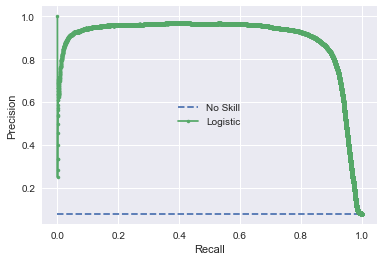

In [894]:
#precision recall curve is appropriate in this case as we are working with imbalance dataset. ROC curve is for balanced dataset
#precision recall curve is more concerned about prediction of the minority class 1

#clf.fit(X_train, y_train)
# predict probabilities
lr_probs = clf.predict_proba(X_test)#Predict will give either 0 or 1 as output. Predict_proba will give the probabilities of the target in array form
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1] # selecting second row to select probability of 1 only
# predict class values
yhat = clf.predict(X_test)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#model is above the no skill line for most threshold. The f1 and auc is also pretty high

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.973


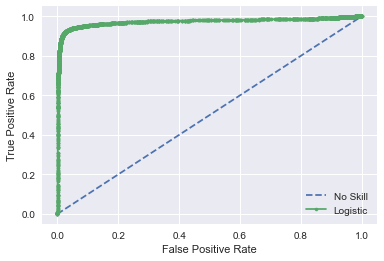

In [895]:
#We are still going to do the ROC curve here but it would not give us a accurate representation evaluating the model as it is a imbalanced dataset
#A good model will have a curve that increases quickly from 0 to 1 (meaning that only a little precision has to be sacrificed to get a high recall)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
#model = LogisticRegression(solver='lbfgs')
#clf.fit(X_train, y_train)
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## AdaBoost

**AdaBoost Decision Tree**

In [15]:
#replacement and null value happening in a pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), #replacing the numerical null values with median

            ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude= 'category')),
    ]
)


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier())] # importnt paramers for adaboost is base_estimator, n_estimators and learning_rate. Using Decision Tree
)


#Segmention test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


#calculating accuracy score
clf.fit(X_train, y_train)
print("model score on train: %.3f" % clf.score(X_train, y_train))
print("model score on test: %.3f" % clf.score(X_test, y_test))


#Confusion Matrix
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
print(cm)


#Classification Report
target_names = ["Not Vacant Lots", "Vacant Lots"]
print(classification_report(y_test, y_pred, target_names=target_names))

#model performing better than the best result  we got from logistic Regression.This was also way faster to run
#Adaboost does not require feature scaling as it is not sensitive to variance. Using Power transformer does not improve the model
#Did not use one hot encoder here as decision tree tend to perform worse if we use one hot encoder

model score on train: 0.986
model score on test: 0.986
[[84525   316]
 [ 1004  6336]]
                 precision    recall  f1-score   support

Not Vacant Lots       0.99      1.00      0.99     84841
    Vacant Lots       0.95      0.86      0.91      7340

       accuracy                           0.99     92181
      macro avg       0.97      0.93      0.95     92181
   weighted avg       0.99      0.99      0.99     92181



In [16]:
import pickle
pickle.dump(clf,open('adaboost.pkl','wb'))#download model